In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import random
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(3)

In [379]:
file_path = 'data/tvmarketing.csv'

df = pd.read_csv(file_path)
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


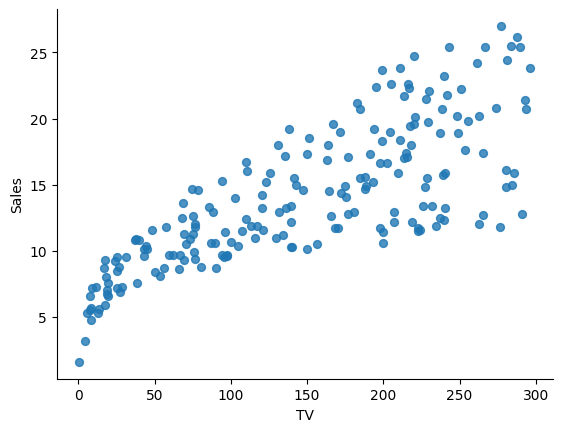

In [380]:
_df_4.plot(kind='scatter', x='TV', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [381]:
df.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [382]:
# normalized_df = (df - df.mean()) / df.std()
# normalized_df.head()

In [383]:
# normalized_df.plot(kind='scatter', x='TV', y='Sales', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [384]:
# normalized_df.corr()

In [385]:
# X = normalized_df["TV"]
# Y = normalized_df["Sales"]
X = df["TV"]
Y = df["Sales"]

In [386]:
X_np = X.to_numpy()
Y_np = Y.to_numpy()

In [387]:
def scatter(X_b,Y_b,X,Y,color_b, color, label_b, label, title, x_label, y_label):
  plt.scatter(X_b, Y_b, color=color_b, label=label_b)
  plt.scatter(X, Y, color=color, label=label)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.tight_layout()
  plt.show()

In [388]:
sklearn_model = LR().fit(X_np.reshape((len(X_np),1)), Y_np)
sklearn_sales = sklearn_model.predict(X_np.reshape((len(X_np),1)))
sklearn_sales.shape
print(sklearn_model.coef_)
print(sklearn_model.intercept_)

[0.04753664]
7.032593549127695


In [389]:
p_df = pd.DataFrame({"TV":X_np,
                              "Sales":Y_np,
                              "Sk_Sales":sklearn_sales})

p_df.head()

,TV,Sales,Sk_Sales
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218


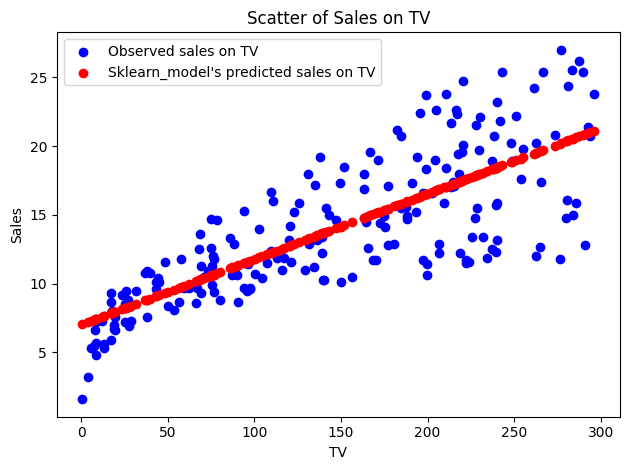

In [390]:
title = 'Scatter of Sales on TV'
label_b = 'Observed sales on TV'
label = "Sklearn_model's predicted sales on TV"
color_b = 'b'
color = 'r'
x_label = 'TV'
y_label = 'Sales'

scatter(p_df['TV'], p_df['Sales'],p_df['TV'],p_df['Sk_Sales'],color_b, color,label_b,label, title,x_label,y_label)

In [391]:
mean_X = X.mean()
std_X = X.std()
mean_Y = Y.mean()
std_Y = Y.std()

# Normalize X and Y
X_normalized = (X - mean_X) / std_X
Y_normalized = (Y - mean_Y) / std_Y
print(mean_X)
print(mean_Y)

147.0425
14.0225


In [392]:
X_npy = np.array(X_normalized).reshape((1,len(X_normalized)))
Y_npy = np.array(Y_normalized).reshape((1,len(Y_normalized)))


In [393]:
def layersizes(X, Y):

  n_x = X.shape[0]
  n_y = Y.shape[0]

  return n_x,n_y

n_x, n_y = layersizes(X_npy, Y_npy)
print(f"# of input layersize: {n_x}")
print(f"# of output layersize: {n_y}")


# of input layersize: 1
# of output layersize: 1


In [394]:
def initialize_parameters(n_x, n_y):

  W = np.random.rand(n_y, n_x) * 0.01
  b = np.zeros((n_y, 1))

  parameters = {"W":W,
                "b":b}

  return parameters


parameters = initialize_parameters(n_x, n_y)
print(f"weight: {parameters['W']}")
print(f"bias: {parameters['b']}")

weight: [[0.00550798]]
bias: [[0.]]


In [395]:
def forward_propagation(parameters, X):

  W = parameters["W"]
  b = parameters["b"]

  Z = np.matmul(W,X) + b
  Y_hat = Z

  return Y_hat


Y_hat = forward_propagation(parameters, X_npy)
#print(f"predicated sales:{Y_hat}")

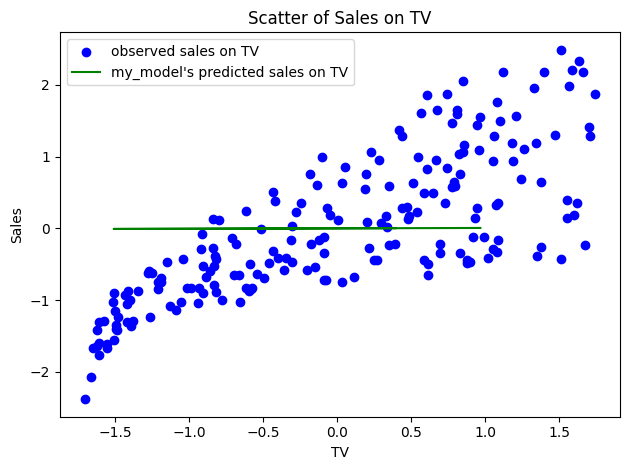

In [396]:
X_plot = X_npy[:, :5].reshape(5)
Y_plot = Y_hat[:, :5].reshape(5)

plt.scatter(X_npy, Y_npy, color='b', label = "observed sales on TV")
plt.plot(X_plot,Y_plot, color='g', label = "my_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [397]:
def cost_function(Y, Y_hat):

  n = Y.shape[1]
  error = Y - Y_hat
  cost = np.sum(error**2)/(2*n)

  return cost

cost = cost_function(Y_npy, Y_hat)
print(f"variance of predicted sales on observed sales: {cost}")

variance of predicted sales on observed sales: 0.49322815972495576


In [398]:
def back_propagation(X, Y, Y_hat):

  n = Y.shape[1]
  C = Y_hat - Y
  dLdW = np.dot(C, X.T)/(n)
  dLdb = np.sum(C * 1)/(n)

  grads = {"dLdW":dLdW,
           "dLdb":dLdb}

  return grads

grads = back_propagation(X_npy, Y_npy, Y_hat)
print(f"slope of weight on cost_function: {grads['dLdW']}")
print(f"slope of bias on cost_function: {grads['dLdb']}")

slope of weight on cost_function: [[-0.77283286]]
slope of bias on cost_function: 1.7319479184152443e-16


In [416]:
def update_parameters(parameters, grads, learning_rate):

    W = parameters["W"]
    b = parameters["b"]

    dLdW = grads["dLdW"]
    dLdb = grads["dLdb"]

    W = W - learning_rate * dLdW
    b = b - learning_rate * dLdb

    parameters = {"W": W,
                  "b": b}

    return parameters
updated_parameters = update_parameters(parameters, grads, 0.01)
print(f"updated weight: {updated_parameters['W']}")
print(f"updated bias: {updated_parameters['b']}")

updated weight: [[0.01323631]]
updated bias: [[-1.73194792e-18]]


In [400]:
def nn_model(X, Y, learning_rate=0.01, num_iterations=100, print_cost=False):

  cl = []
  wl = []
  bl = []
  gbl = []
  gwl = []

  n_x, n_y = layersizes(X, Y)
  parameters = initialize_parameters(n_x, n_y)

  for i in range(num_iterations):
    wl.append(parameters["W"][0,0])
    bl.append(parameters["b"][0,0])
    Y_hat = forward_propagation(parameters, X)
    cost = cost_function(Y, Y_hat)
    cl.append(cost)
    grads = back_propagation(X, Y, Y_hat)
    gwl.append(grads['dLdW'][0,0])
    gbl.append(grads['dLdb'])
    parameters = update_parameters(parameters, grads, learning_rate)

    if print_cost and i%50==0:
      print(f"cost after {i+1} iterations is {cost}\n")

  cache ={"cl":cl,
          "wl":wl,
          "bl":bl,
          "gwl":gwl,
          "gbl":gbl}

  return parameters,cache



In [417]:
my_model, cache= nn_model(X_npy, Y_npy, 0.1, 500, True)
cl = cache["cl"]
bl = cache["bl"]
wl = cache["wl"]
gwl = cache["gwl"]
gbl = cache["gbl"]
print(my_model["W"])
print(my_model["b"])
# print(cl)
# print(wl)
# print(bl)



cost after 1 iterations is 0.4952400598407117

cost after 51 iterations is 0.19310064601909555

cost after 101 iterations is 0.19309216244030136

cost after 151 iterations is 0.19309216220209635

cost after 201 iterations is 0.1930921622020897

cost after 251 iterations is 0.19309216220208966

cost after 301 iterations is 0.1930921622020897

cost after 351 iterations is 0.19309216220208966

cost after 401 iterations is 0.19309216220208966

cost after 451 iterations is 0.19309216220208966

[[0.78222442]]
[[-2.77999845e-16]]


In [418]:
def predict(parameters, X):

  Y_pred_norm = forward_propagation(parameters, X)
  Y_pred = Y_pred_norm * std_Y + mean_Y
  return Y_pred

Y_pred = predict(my_model, X_npy)

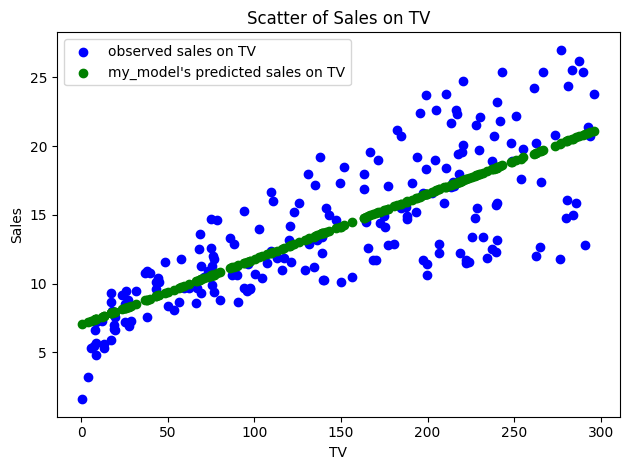

In [419]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_np, Y_pred, color='g', label = "my_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.tight_layout()
plt.legend()
plt.show()

In [420]:
p_df["my_model_Sales"] = Y_pred.reshape((200,))

p_df.head()

,TV,Sales,Sk_Sales,my_model_Sales,Stat_Sales
0,230.1,22.1,17.970775,17.970775,17.970775
1,44.5,10.4,9.147974,9.147974,9.147974
2,17.2,9.3,7.850224,7.850224,7.850224
3,151.5,18.5,14.234395,14.234395,14.234395
4,180.8,12.9,15.627218,15.627218,15.627218


In [ ]:
def cost(b):
  np.sum(Y-(m))


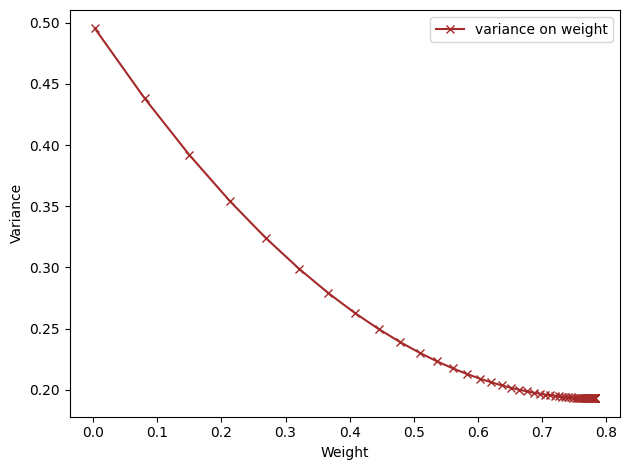

In [421]:
plt.plot(wl,cl, c='brown', marker = 'x', label='variance on weight')
plt.xlabel('Weight')
plt.ylabel('Variance')
plt.legend()
plt.tight_layout()
plt.show()

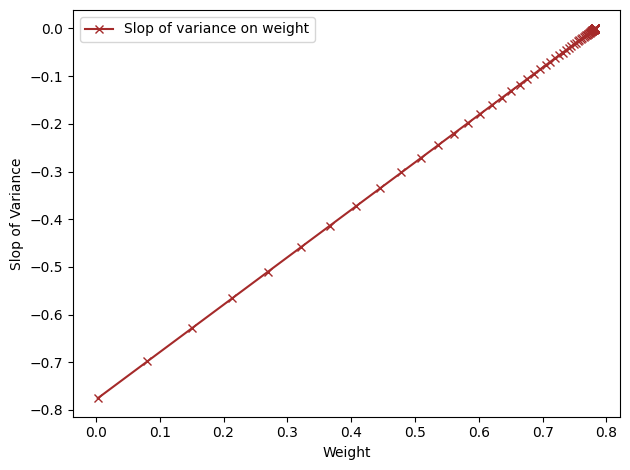

In [422]:
plt.plot(wl,gwl, c='brown', marker = 'x', label='Slop of variance on weight')
plt.xlabel('Weight')
plt.ylabel('Slop of Variance')
plt.legend()
plt.tight_layout()
plt.show()

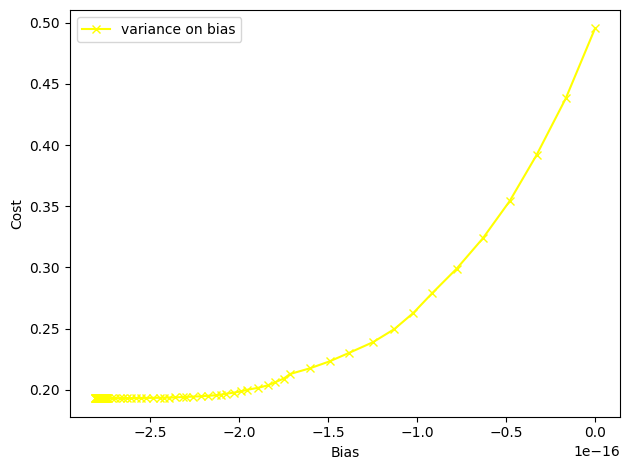

In [423]:
plt.plot(bl,cl, c='yellow', marker = 'x', label='variance on bias')
plt.xlabel('Bias')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()

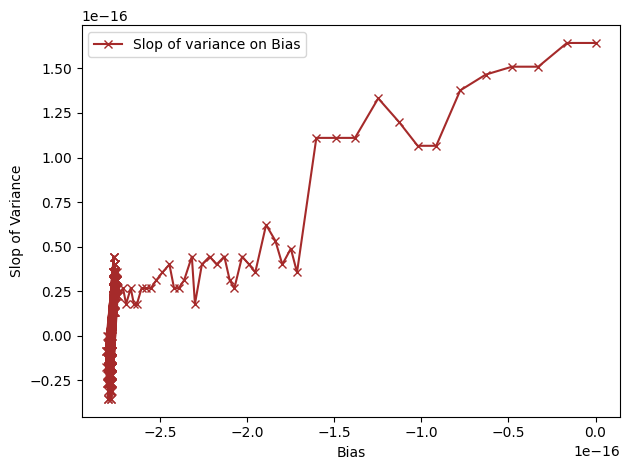

In [435]:
plt.plot(bl,gbl, c='brown', marker = 'x', label='Slop of variance on Bias')
plt.xlabel('Bias')
plt.ylabel('Slop of Variance')
plt.legend()
plt.tight_layout()
plt.show()

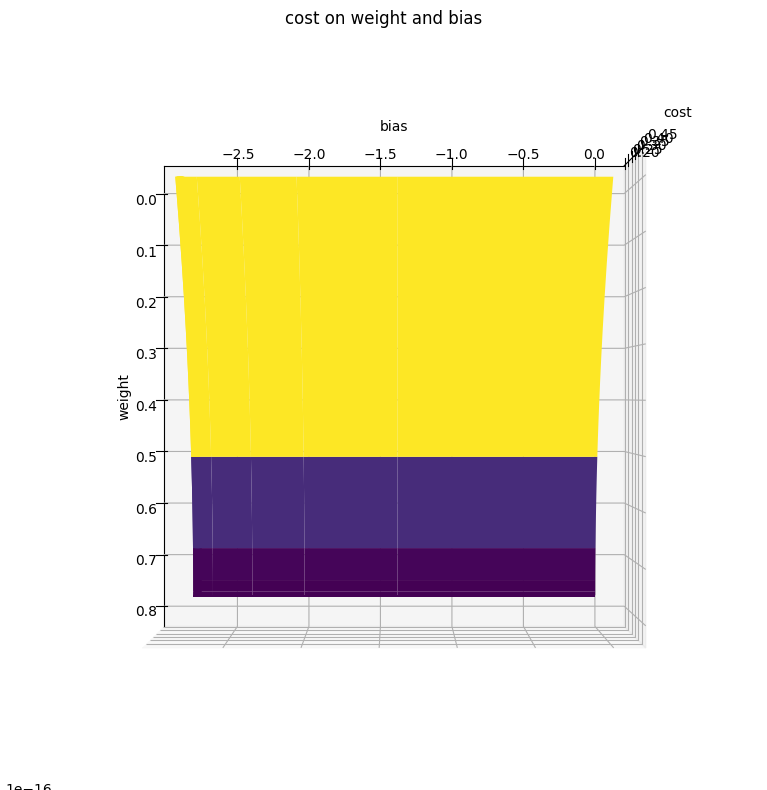

In [445]:
c = np.tile(cl, (500, 1))
w, b =np.meshgrid(wl,bl)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(w,b,c,cmap='coolwarm')


surf = ax.plot_surface(w, b, c, cmap='viridis')


ax.set_title("cost on weight and bias")
ax.set_xlabel("weight")
ax.set_ylabel("bias")
ax.set_zlabel("cost")
ax.view_init(90,0)
plt.tight_layout()
plt.show()

In [410]:
class StatisticsModel:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X, Y):
        self.m = (np.mean(X) * np.mean(Y) - np.mean(X * Y)) / ((np.mean(X) ** 2) - np.mean(X ** 2))
        self.b = np.mean(Y) - self.m * np.mean(X)

    def predict(self, X):
        return self.m * X + self.b


stat_model = StatisticsModel()
stat_model.fit(X_np, Y_np)
Y_stat_pred = stat_model.predict(X_np)

p_df['Stat_Sales'] = Y_stat_pred
print(Y_stat_pred.shape)


(200,)


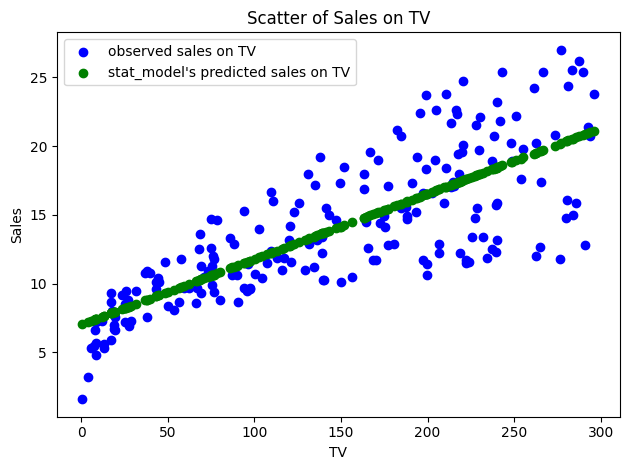

In [411]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_np, Y_stat_pred, color='g', label = "stat_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.tight_layout()
plt.legend()
plt.show()

In [412]:
p_df.head()

,TV,Sales,Sk_Sales,my_model_Sales,Stat_Sales
0,230.1,22.1,17.970775,17.970775,17.970775
1,44.5,10.4,9.147974,9.147974,9.147974
2,17.2,9.3,7.850224,7.850224,7.850224
3,151.5,18.5,14.234395,14.234395,14.234395
4,180.8,12.9,15.627218,15.627218,15.627218


In [413]:
p_df.corr()

,TV,Sales,Sk_Sales,my_model_Sales,Stat_Sales
TV,1.000000,0.782224,1.000000,1.000000,1.000000
Sales,0.782224,1.000000,0.782224,0.782224,0.782224
Sk_Sales,1.000000,0.782224,1.000000,1.000000,1.000000
my_model_Sales,1.000000,0.782224,1.000000,1.000000,1.000000
Stat_Sales,1.000000,0.782224,1.000000,1.000000,1.000000


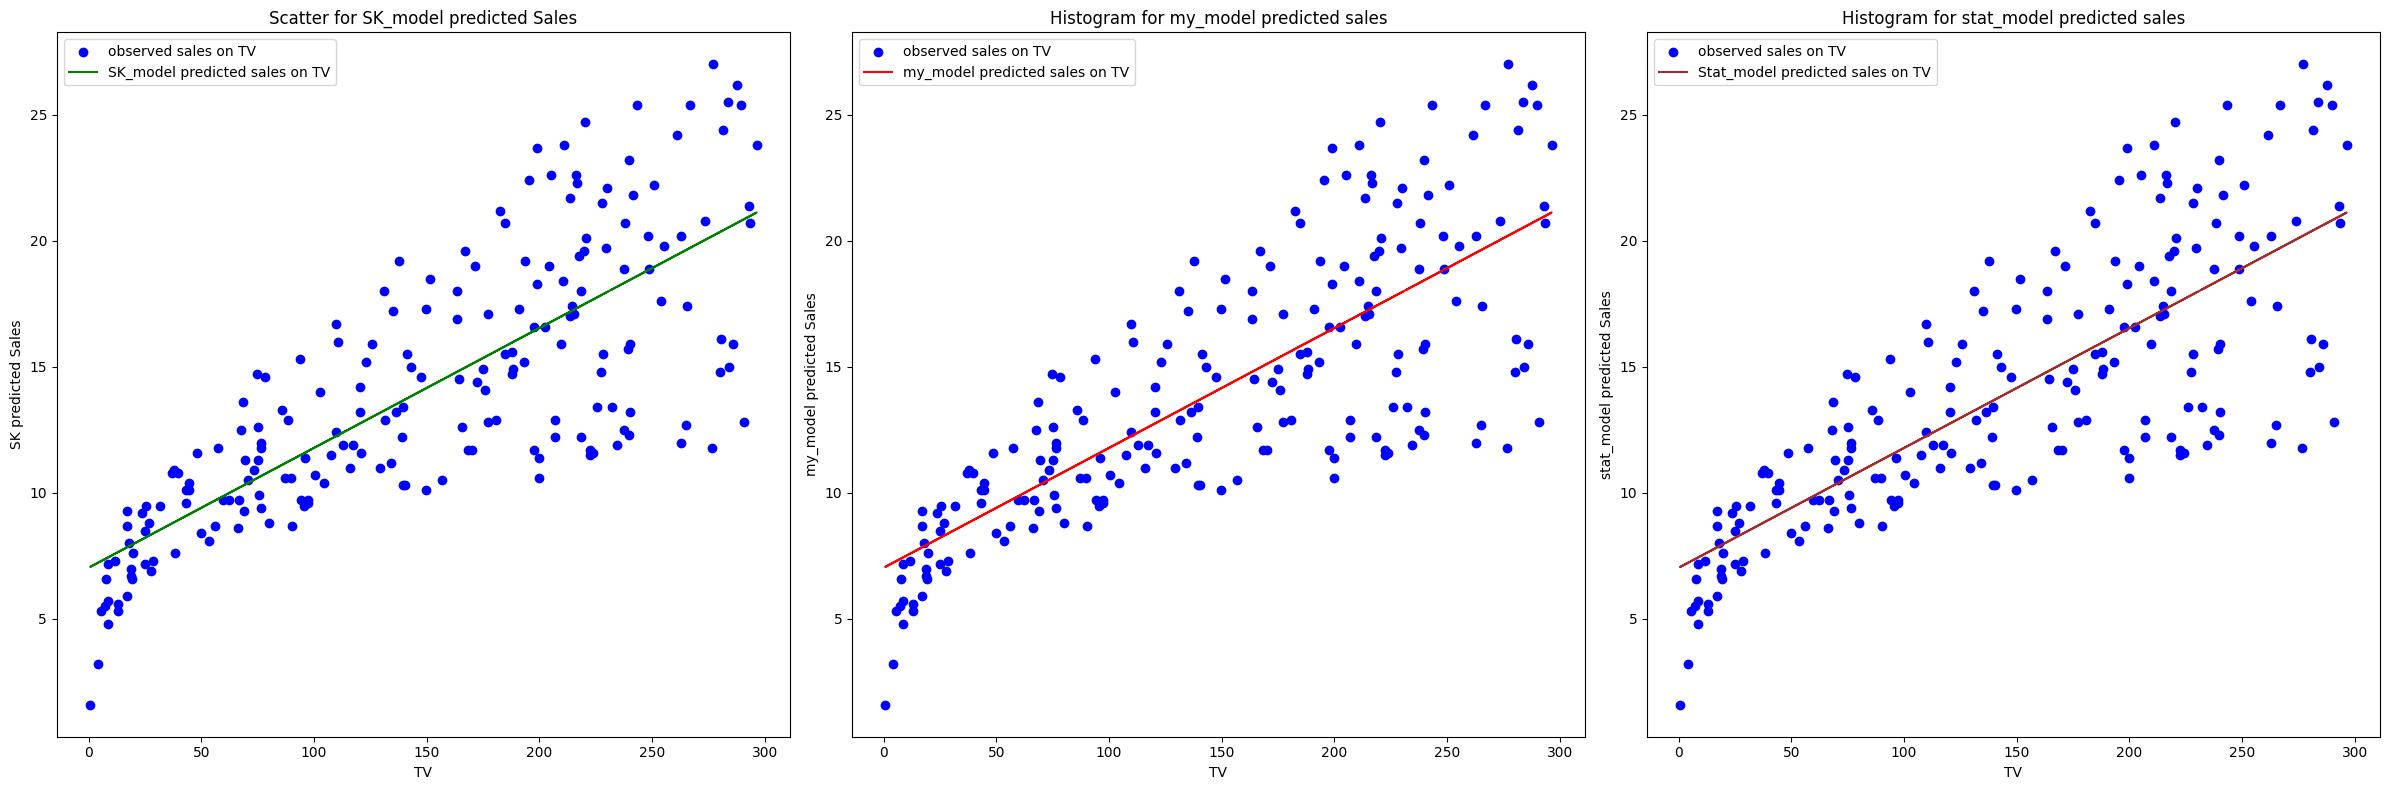

In [414]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))


# Plot histogram for data2
axs[0].scatter(p_df['TV'], p_df['Sales'], color='b', label = "observed sales on TV")
axs[0].plot(p_df['TV'], p_df['Sk_Sales'], color='green', label = "SK_model predicted sales on TV")
axs[0].set_ylabel('SK predicted Sales')
axs[0].set_xlabel('TV')
axs[0].set_title('Scatter for SK_model predicted Sales')
axs[0].legend()

# Plot histogram for data3
axs[1].scatter(p_df['TV'], p_df['Sales'], color='b', label = "observed sales on TV")
axs[1].plot(p_df['TV'], p_df['my_model_Sales'],  color='red', label = "my_model predicted sales on TV")
axs[1].set_ylabel('my_model predicted Sales')
axs[1].set_xlabel('TV')
axs[1].set_title('Histogram for my_model predicted sales')
axs[1].legend()


# Plot histogram for data3
axs[2].scatter(p_df['TV'], p_df['Sales'], color='b', label = "observed sales on TV")
axs[2].plot(p_df['TV'], p_df['Stat_Sales'], color='brown', label = "Stat_model predicted sales on TV")
axs[2].set_ylabel('stat_model predicted Sales')
axs[2].set_xlabel('TV')
axs[2].set_title('Histogram for stat_model predicted sales')
axs[2].legend()


#show the labels


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


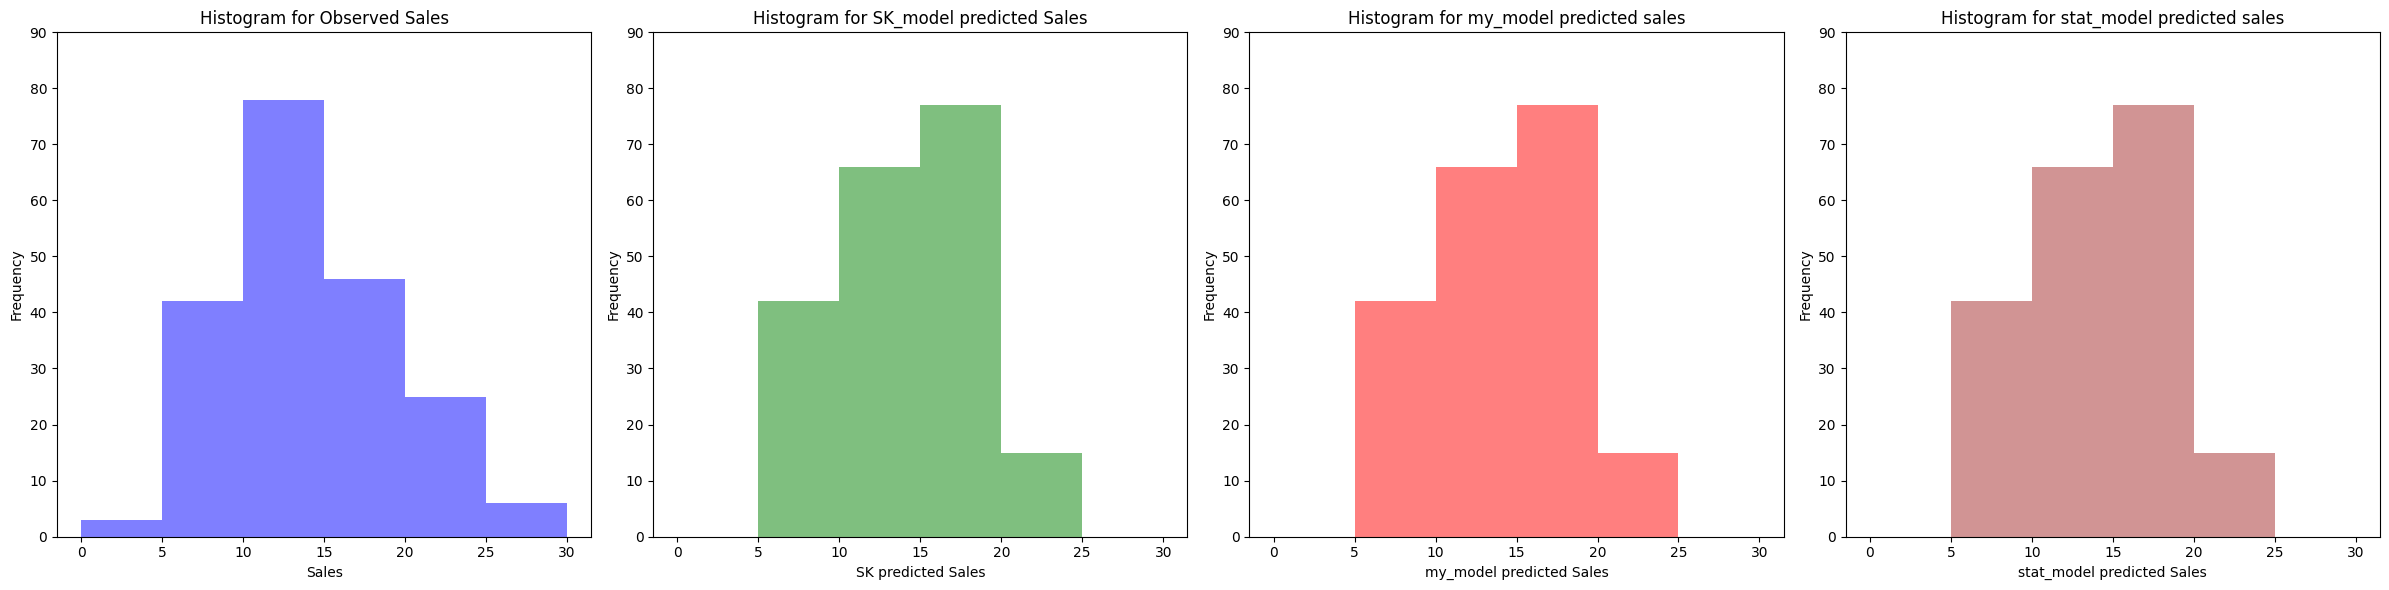

In [446]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
bins = [i for i in range(0,31,5)]
y_ticks = [i for i in range(0,100,10)]
x_ticks = [i for i in range(0,31,10)]

# Plot histogram for data1
axs[0].hist(p_df['Sales'], bins=bins, color='blue', alpha=0.5)
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for Observed Sales')
#axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)

# Plot histogram for data2
axs[1].hist(p_df['Sk_Sales'], bins=bins, color='green', alpha=0.5)
axs[1].set_xlabel('SK predicted Sales')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for SK_model predicted Sales')
#axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)

# Plot histogram for data3
axs[2].hist(p_df['my_model_Sales'], bins=bins, color='red', alpha=0.5)
axs[2].set_xlabel('my_model predicted Sales')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram for my_model predicted sales')
#axs[2].set_xticks(x_ticks)
axs[2].set_yticks(y_ticks)

# Plot histogram for data3
axs[3].hist(p_df['Stat_Sales'], bins=bins, color='brown', alpha=0.5)
axs[3].set_xlabel('stat_model predicted Sales')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Histogram for stat_model predicted sales')
#axs[3].set_xticks(x_ticks)
axs[3].set_yticks(y_ticks)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
